# Monoidal categories in DisCoPy

## Categories

A *category* consists of a collection of *objects* $A, B, C, \ldots$ and a collection of *morphisms* between objects of the form $f: A \to B, g: B \to C, h: C \to D, \ldots$, such that:

* Morphisms with matching types compose. For example, $f: A \to B$ and $g: B \to C$ can compose to make $g \circ f: A \to C$, but not $f \circ g$.
* Morphisms compose in an associative way: $(h \circ g) \circ f = h \circ (g \circ f)$
* Each object has an identity arrow: $1_B \circ f = f = f \circ 1_A$

These definitions are implicitly encoded in this *commutative diagram*: any directed path between two specific objects represents equal morphisms.
<center>
    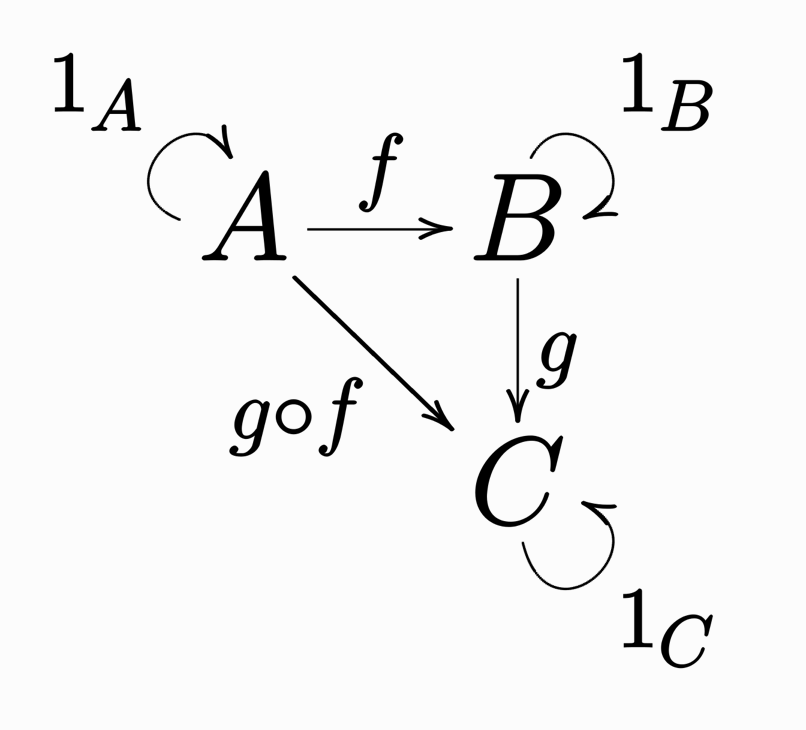
</center>

In [1]:
from discopy.cat import Arrow, Box, Id, Ob

A, B, C, D = map(Ob, 'ABCD')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', C, D)

# the codomain of f and domain of g match, so f and g compose
g << f
assert f.cod == g.dom == B
assert g << f == f >> g

# associativity
assert h << (g << f) == h << g << f == (h << g) << f

# identity
assert f << Id(A) == f == Id(B) << f

In [2]:
# only arrows that 'type-check' can be composed
arrow = h << g << f
assert arrow == f >> g >> h
assert arrow == Arrow(inside=(f, g, h), dom=A, cod=D)

In [3]:
print(arrow)
print(f'Indexing:', arrow[0])
print(f'Slicing:', arrow[1:])
print(f'Reversing (dagger):', arrow[::-1])

f >> g >> h
Indexing: f
Slicing: g >> h
Reversing (dagger): h[::-1] >> g[::-1] >> f[::-1]


## Monoidal categories

A *monoidal category* is a category equipped with the *monoidal product* $\otimes$ and *monoidal unit* $I$ and has the following properties:

* objects can be combined to return another object (e.g $A \otimes B$)
* morphisms can be combined to return another morphism ($(f: A \to B) \otimes (g: C \to D) = f \otimes g: A \otimes C \to B \otimes D$).
* $\otimes$ is associative on objects: $(A \otimes B) \otimes C = A \otimes (B \otimes C)$
* $\otimes$ is associative on morphisms: $(f \otimes g) \otimes h = f \otimes (g \otimes h)$
* $I$ is the identity on objects for $\otimes$: $A \otimes I= A = I \otimes A$
* $1_I$ is the identity on arrows for $\otimes$: $f \otimes 1_I = f = 1_I \otimes f$

In [4]:
from discopy.monoidal import Box, Id, Ty

A, B, C = Ty('A'), Ty('B'), Ty('C')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', B, A)

# combining objects
A @ B
# combining arrows
f @ g

# associativity
assert (A @ B) @ C == A @ B @ C == A @ (B @ C)
assert (f @ g) @ h == f @ g @ h == f @ (g @ h) 

# monoidal unit
assert A @ Ty() == A == Ty() @ A
assert f @ Id(Ty()) == f == Id(Ty()) @ f

monoidal.Diagram(inside=(monoidal.Layer(monoidal.Ty(), monoidal.Box('x', monoidal.Ty(cat.Ob('A')), monoidal.Ty(cat.Ob('A'))), monoidal.Ty(cat.Ob('A'))), monoidal.Layer(monoidal.Ty(), monoidal.Box('y', monoidal.Ty(cat.Ob('A'), cat.Ob('A')), monoidal.Ty(cat.Ob('B'))), monoidal.Ty())), dom=monoidal.Ty(cat.Ob('A'), cat.Ob('A')), cod=monoidal.Ty(cat.Ob('B')))


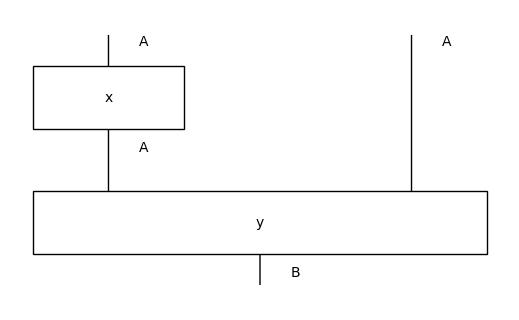

In [5]:
x = Box('x', A, A)
y = Box('y', A @ A, B)

diagram = x @ Id(A) >> y
print(repr(diagram))
diagram.draw(figsize=(5, 3))

In [6]:
t = A @ B @ C

print(t)
print(repr(t))

print('Indexing:', t[0])
print(f'Slicing:', t[1:])
print(f'Reversing:', t[::-1])

A @ B @ C
monoidal.Ty(cat.Ob('A'), cat.Ob('B'), cat.Ob('C'))
Indexing: A
Slicing: B @ C
Reversing: C @ B @ A


In [7]:
# indexing a Ty gives an Ob back
print('Indexing (Ob):', repr(t[0]))

# trick to get a Ty with a single object
print('Indexing (Ty):', repr(t[0:1]))

Indexing (Ob): monoidal.Ty(cat.Ob('A'))
Indexing (Ty): monoidal.Ty(cat.Ob('A'))


x @ A >> y
Indexing: x @ A
Slicing: y
Reversing (dagger): y[::-1] >> x[::-1] @ A

Dagger operation:


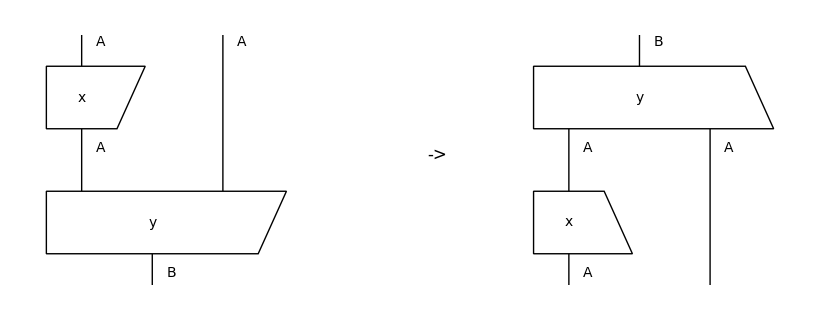

In [8]:
print(diagram)
print(f'Indexing:', diagram[0])
print(f'Slicing:', diagram[1:])
print(f'Reversing (dagger):', diagram[::-1])

from discopy.drawing import Equation

print('\nDagger operation:')
# boxes are drawn as trapeziums to demonstrate the reflection along the horizontal axis
Equation(diagram, diagram[::-1], symbol='->').draw(figsize=(8, 3), asymmetry=0.2)

The internal representation of a diagram contains the domain (input type), codomain (output type), the list of boxes that make up the diagram, and a list of offsets for the boxes. For example, by adjusting the offset of the first box to 1, the box is then connected to the second wire rather than the first.

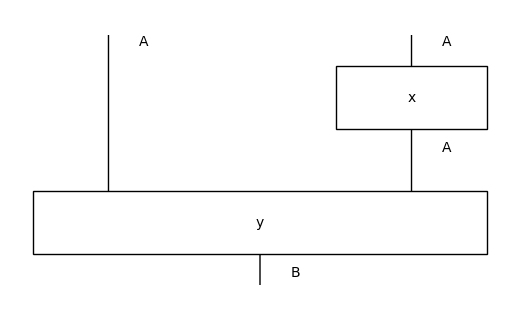

In [9]:
from discopy.monoidal import Diagram

offset_diagram = Diagram.decode(
    dom=Ty('A', 'A'), cod=Ty('B'),
    boxes=[Box('x', Ty('A'), Ty('A')), Box('y', Ty('A', 'A'), Ty('B'))],
    offsets=[1, 0])

offset_diagram.draw(figsize=(5, 3))

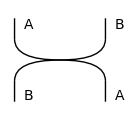

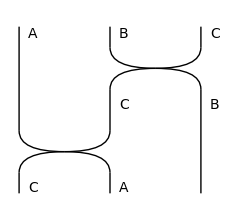

In [10]:
from discopy.symmetric import Diagram, Swap

Swap(A, B).draw(figsize=(1, 1))
Diagram.swap(A @ B, C).draw(figsize=(2, 2))

## Rigid monoidal categories

A *rigid category* is a monoidal category where every object $A$ has a *left adjoint* $A^l$ and *right adjoint* $A^r$. The left adjoint of the right adjoint of a type is equal to the type itself, and vice versa: $(A^r)^l = A = (A^l)^r$

In [11]:
from discopy.rigid import Box, Id, Ty

A = Ty('A')

print(A.l, 'is represented as', repr(A.l))
print(A.r, 'is represented as', repr(A.r))

assert A.r.l == A == A.l.r

A.l is represented as rigid.Ty(rigid.Ob('A', z=-1))
A.r is represented as rigid.Ty(rigid.Ob('A', z=1))


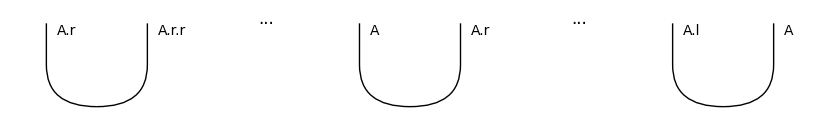

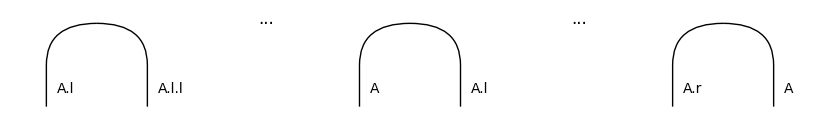

In [12]:
from discopy.rigid import Cap, Cup

Equation(Cup(A.r, A.r.r), Cup(A, A.r), Cup(A.l, A), symbol='...').draw(figsize=(8, 1))
Equation(Cap(A.l, A.l.l), Cap(A, A.l), Cap(A.r, A), symbol='...').draw(figsize=(8, 1))

Snake Equations - For any object A :


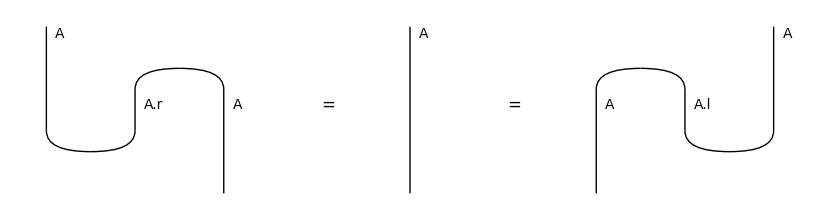

In [13]:
snake1 = Id(A) @ Cap(A.r, A) >> Cup(A, A.r) @ Id(A)
snake2 = Cap(A, A.l) @ Id(A) >> Id(A) @ Cup(A.l, A)

assert snake1.normal_form() == Id(A) == snake2.normal_form()
print('Snake Equations - For any object', A, ':')
Equation(snake1, Id(A), snake2).draw(figsize=(8, 2))

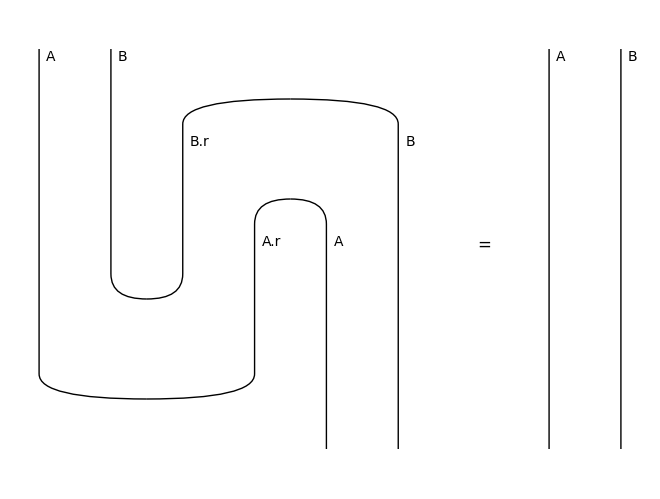

In [14]:
from discopy.rigid import Diagram

A, B = Ty('A'), Ty('B')

nested_cup = Diagram.cups(A @ B, (A @ B).r)
nested_cap = Diagram.caps((A @ B).r, A @ B)

nested_snake = Id(A @ B) @ nested_cap >> nested_cup @ Id(A @ B)

assert nested_snake.normal_form() == Id(A @ B)
Equation(nested_snake, nested_snake.normal_form()).draw()